In [1]:
from datetime import date


print("Name- Pratyush Mohanty")
print("Roll No-118CS0180")
print("Date- {}".format(date.today()))
print("Machine learning Lab")

Name- Pratyush Mohanty
Roll No-118CS0180
Date- 2021-09-21
Machine learning Lab


# Question No 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv(r"C:\Users\Pratyush\Downloads\marks.csv")

In [4]:
dataset.shape

(20, 2)

In [5]:
dataset.head()

,Hours Spent Studying,SAT Score
0,4,390
1,9,580
2,10,650
3,14,730
4,4,410


In [6]:
dataset.describe()

,Hours Spent Studying,SAT Score
count,20.000000,20.000000
mean,9.450000,592.500000
std,4.978639,135.058467
min,1.000000,350.000000
25%,5.750000,502.500000
50%,10.000000,620.000000
75%,12.250000,692.500000
max,22.000000,790.000000


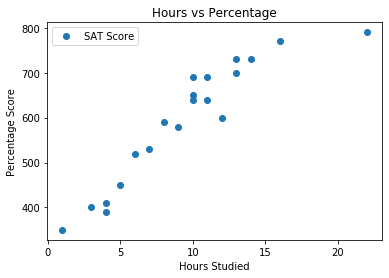

In [7]:
dataset.plot(x="Hours Spent Studying", y="SAT Score", style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
regressor.score(X,y)

0.8695684617148458

In [12]:
print(regressor.intercept_)


360.4058441558442


In [13]:
print(regressor.coef_)

[24.25324675]


In [14]:
y_pred = regressor.predict(X_test)

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,730,675.698052
1,580,578.685065
2,640,602.938312
3,350,384.659091


In [16]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 31.834415584415623
Mean Squared Error: 1381.3129849047089
Root Mean Squared Error: 37.166019223273146


In [17]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9299714583064786

In [18]:
class Stats:
    def __init__(self, X, y, model):
        self.data = X
        self.target = y
        self.model = model
        ## degrees of freedom population dep. variable variance
        self._dft = X.shape[0] - 1   
        ## degrees of freedom population error variance
        self._dfe = X.shape[0] - X.shape[1] - 1  
    
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        return 1 - self.sse()/self.sst()
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        return 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)

    
def pretty_print_stats(stats_obj):
    '''returns report of statistics for a given model object'''
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()), 
             ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1]))
        

        
stats = Stats(X_test, y_test, regressor)
pretty_print_stats(stats)

sse:     5525.2519
sst:     78900.0000
r^2:     0.9300
adj_r^2: 0.8950


# Question 2

# No 2 (a)

In [19]:
import pandas as pd
import numpy as np
  
# read the data in a pandas dataframe
data = pd.read_csv(r"C:\Users\Pratyush\Downloads\weather.csv")
  


In [20]:
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [21]:
data.describe()

,TempHighF,TempAvgF,TempLowF
count,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957
std,14.766523,14.045904,14.190648
min,32.000000,29.000000,19.000000
25%,72.000000,62.000000,49.000000
50%,83.000000,73.000000,63.000000
75%,92.000000,83.000000,73.000000
max,107.000000,93.000000,81.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [23]:
# drop or delete the unnecessary columns in the data.
#data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches', 
                  #'SeaLevelPressureLowInches'], axis = 1)
  
# some values have 'T' which denotes trace rainfall
# we need to replace all occurrences of T with 0
# so that we can use the data in our model
data = data.replace('T', 0.0)
  
# the data also contains '-' which indicates no 
# or NIL. This means that data is not available
# we need to replace these values as well.
data = data.replace('-', 0.0)
  


In [24]:
data

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [25]:
data["TempAvgF"]=data["TempAvgF"].astype(float)
data["PrecipitationSumInches"]=data["PrecipitationSumInches"].astype(float)
X=data[["TempAvgF"]]
y=data["PrecipitationSumInches"]


Text(0, 0.5, 'PrecipitationSumInches')

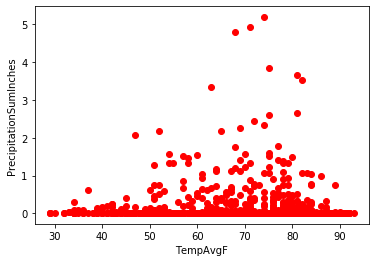

In [26]:
plt.scatter(X,y,color="Red")
plt.xlabel("TempAvgF")
plt.ylabel("PrecipitationSumInches")

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
regressor.score(X,y)

0.0003840389657119303

In [30]:
print(regressor.intercept_)

0.17034483456631966


In [31]:
print(regressor.coef_)

[-0.00079796]


In [32]:
y_pred = regressor.predict(X_test)

In [33]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
658,0.00,0.107306
406,0.31,0.125659
1202,0.00,0.119275
202,0.00,0.104114
1187,0.00,0.109700
...,...,...
608,0.00,0.104912
194,0.07,0.103316
240,0.00,0.098528
1154,0.00,0.119275


In [34]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.18693135177528036
Mean Squared Error: 0.17204819216137113
Root Mean Squared Error: 0.41478692380711707


In [35]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.0008765193333482024

In [36]:
class Stats:
    def __init__(self, X, y, model):
        self.data = X
        self.target = y
        self.model = model
        ## degrees of freedom population dep. variable variance
        self._dft = X.shape[0] - 1   
        ## degrees of freedom population error variance
        self._dfe = X.shape[0] - X.shape[1] - 1  
    
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        return 1 - self.sse()/self.sst()
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        return 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)

    
def pretty_print_stats(stats_obj):
    '''returns report of statistics for a given model object'''
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()), 
             ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1]))
        

        
stats = Stats(X_test, y_test, regressor)
pretty_print_stats(stats)

sse:     45.4207
sst:     45.3809
r^2:     -0.0009
adj_r^2: -0.0047


# No 2 (b)

In [37]:
data["HumidityAvgPercent"]=data["HumidityAvgPercent"].astype(float)

In [38]:
X=data[["HumidityAvgPercent"]]
y=data["PrecipitationSumInches"]

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Text(0, 0.5, 'PrecipitationSumInches')

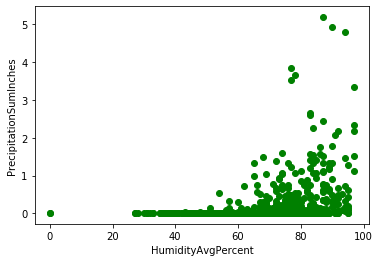

In [40]:
plt.scatter(X,y,color="green")
plt.xlabel("HumidityAvgPercent")
plt.ylabel("PrecipitationSumInches")

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [42]:
print(regressor.score(X,y))
print(regressor.intercept_)
print(regressor.coef_)

0.11653267851780169
-0.6567144889040911
[0.01158764]


In [43]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
658,0.00,-0.007807
406,0.31,0.270297
1202,0.00,-0.054157
202,0.00,0.038544
1187,0.00,0.119657
...,...,...
608,0.00,0.189183
194,0.07,0.061719
240,0.00,0.026956
1154,0.00,0.119657


In [44]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.19043300444012654
Mean Squared Error: 0.15406653629980116
Root Mean Squared Error: 0.39251310334790246


In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.10373031730052784

In [46]:
class Stats:
    def __init__(self, X, y, model):
        self.data = X
        self.target = y
        self.model = model
        ## degrees of freedom population dep. variable variance
        self._dft = X.shape[0] - 1   
        ## degrees of freedom population error variance
        self._dfe = X.shape[0] - X.shape[1] - 1  
    
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        return 1 - self.sse()/self.sst()
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        return 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)

    
def pretty_print_stats(stats_obj):
    '''returns report of statistics for a given model object'''
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()), 
             ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1]))
        

        
stats = Stats(X_test, y_test, regressor)
pretty_print_stats(stats)

sse:     40.6736
sst:     45.3809
r^2:     0.1037
adj_r^2: 0.1003


In [47]:
data.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

# Best and worst 3

In [48]:
z=list(data.columns)
z

['Date',
 'TempHighF',
 'TempAvgF',
 'TempLowF',
 'DewPointHighF',
 'DewPointAvgF',
 'DewPointLowF',
 'HumidityHighPercent',
 'HumidityAvgPercent',
 'HumidityLowPercent',
 'SeaLevelPressureHighInches',
 'SeaLevelPressureAvgInches',
 'SeaLevelPressureLowInches',
 'VisibilityHighMiles',
 'VisibilityAvgMiles',
 'VisibilityLowMiles',
 'WindHighMPH',
 'WindAvgMPH',
 'WindGustMPH',
 'PrecipitationSumInches',
 'Events']

In [49]:
for i in range(1,len(z)-1):
    data[z[i]]=data[z[i]].astype(float)

In [50]:
d={}
X_plot=[]
y_plot=[]
for i in range(1,len(z)-1):
    X=data[[z[i]]]
    y=data["PrecipitationSumInches"]
    X_plot.append(X)
    y_plot.append(y)

    
    print("regression score for {} is".format(z[i]))
    #from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    #from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    d[z[i]]=regressor.score(X,y)
    print(d[z[i]])
    

regression score for TempHighF is
0.00481941208116432
regression score for TempAvgF is
0.0003840389657119303
regression score for TempLowF is
0.001164328024783834
regression score for DewPointHighF is
0.018533085255296955
regression score for DewPointAvgF is
0.01612838248457671
regression score for DewPointLowF is
0.015999077229509107
regression score for HumidityHighPercent is
0.04823298137933463
regression score for HumidityAvgPercent is
0.11653267851780169
regression score for HumidityLowPercent is
0.12889936244950595
regression score for SeaLevelPressureHighInches is
-6.357502547071903e-06
regression score for SeaLevelPressureAvgInches is
-4.052972181645131e-06
regression score for SeaLevelPressureLowInches is
1.6541389408208929e-06
regression score for VisibilityHighMiles is
0.0005362796730875585
regression score for VisibilityAvgMiles is
0.13001063993355422
regression score for VisibilityLowMiles is
0.17784667558871203
regression score for WindHighMPH is
0.05848294712738755
regre

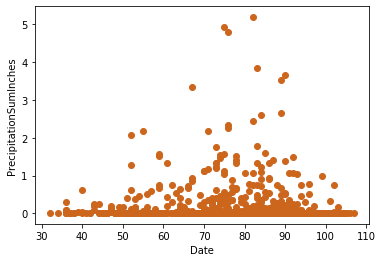

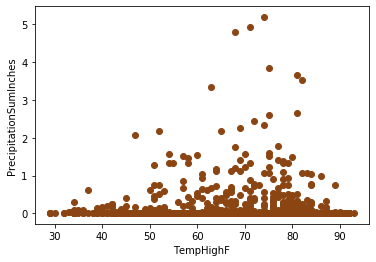

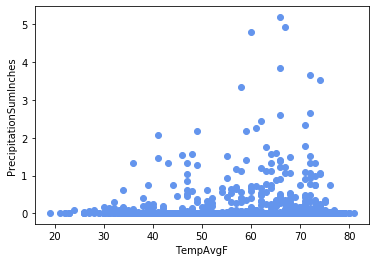

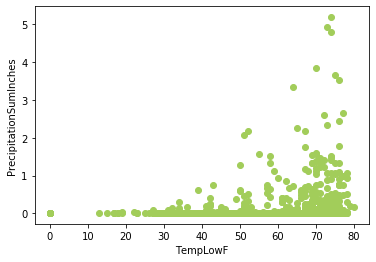

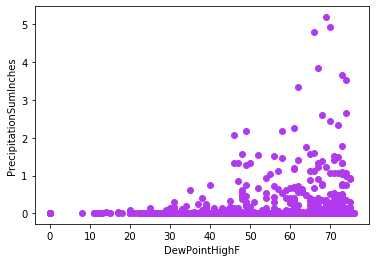

In [51]:
colors=["#CD661D","#8B4513","#6495ED","#A2CD5A","#B23AEE"]
for i in range(5):
    fig, ax = plt.subplots()
    ax.scatter(X_plot[i],y_plot[i],color=colors[i])
    ax.set_xlabel(z[i])
    ax.set_ylabel("PrecipitationSumInches")
plt.show()

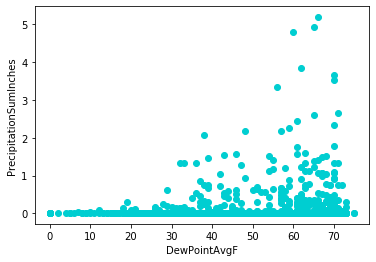

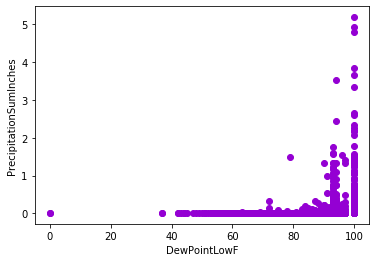

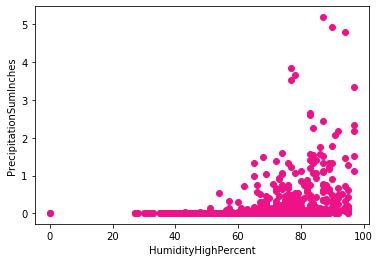

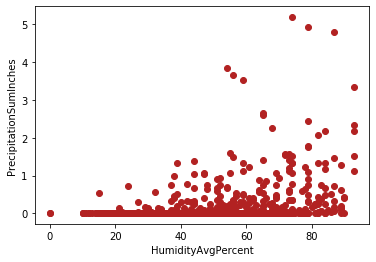

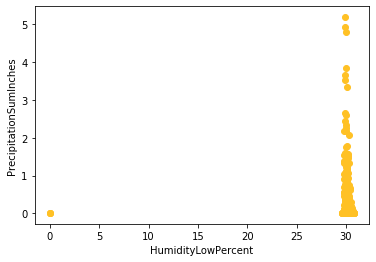

In [52]:
colors=["#00CED1","#9400D3","#EE1289","#B22222","#FFC125"]
for i in range(5,10):
    fig, ax = plt.subplots()
    ax.scatter(X_plot[i],y_plot[i],color=colors[i-5])
    ax.set_xlabel(z[i])
    ax.set_ylabel("PrecipitationSumInches")
plt.show()

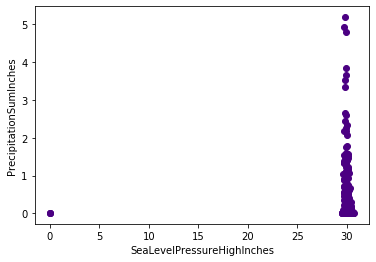

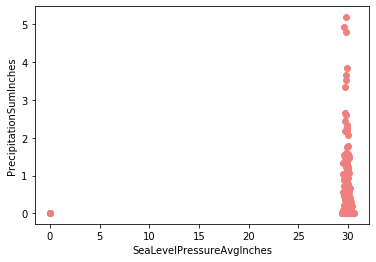

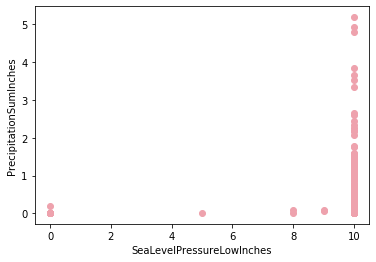

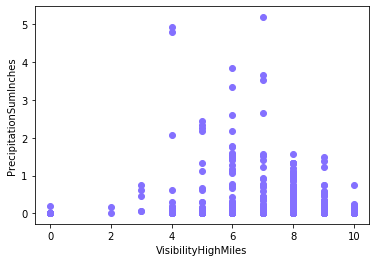

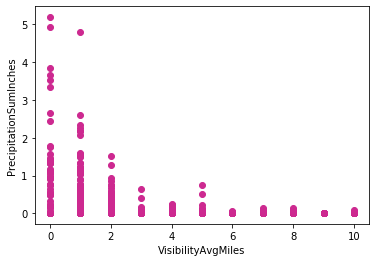

In [53]:
colors=["#4B0082","#F08080","#EEA2AD","#8470FF","#CD2990"]
for i in range(10,15):
    fig, ax = plt.subplots()
    ax.scatter(X_plot[i],y_plot[i],color=colors[i-10])
    ax.set_xlabel(z[i])
    ax.set_ylabel("PrecipitationSumInches")
plt.show()

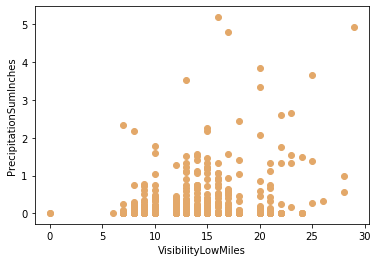

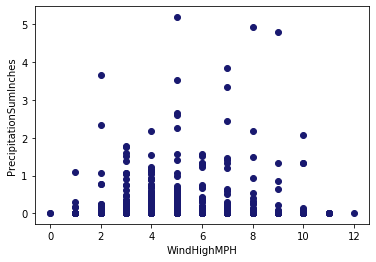

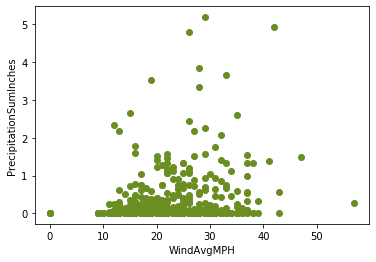

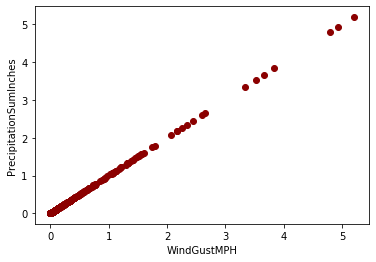

In [54]:
colors=["#E3A869","#191970","#6B8E23","#8B0000"]
for i in range(15,len(X_plot)):
    fig, ax = plt.subplots()
    ax.scatter(X_plot[i],y_plot[i],color=colors[i-15])
    ax.set_xlabel(z[i])
    ax.set_ylabel("PrecipitationSumInches")
plt.show()

In [55]:
d

{'TempHighF': 0.00481941208116432,
 'TempAvgF': 0.0003840389657119303,
 'TempLowF': 0.001164328024783834,
 'DewPointHighF': 0.018533085255296955,
 'DewPointAvgF': 0.01612838248457671,
 'DewPointLowF': 0.015999077229509107,
 'HumidityHighPercent': 0.04823298137933463,
 'HumidityAvgPercent': 0.11653267851780169,
 'HumidityLowPercent': 0.12889936244950595,
 'SeaLevelPressureHighInches': -6.357502547071903e-06,
 'SeaLevelPressureAvgInches': -4.052972181645131e-06,
 'SeaLevelPressureLowInches': 1.6541389408208929e-06,
 'VisibilityHighMiles': 0.0005362796730875585,
 'VisibilityAvgMiles': 0.13001063993355422,
 'VisibilityLowMiles': 0.17784667558871203,
 'WindHighMPH': 0.05848294712738755,
 'WindAvgMPH': 0.0011209536309492174,
 'WindGustMPH': 0.04013828337369074,
 'PrecipitationSumInches': 1.0}

In [56]:
d={k: v for k, v in sorted(d.items(), key=lambda item: item[1])}

In [57]:

temp=[]
for i in d:
    temp.append(i)
print(temp)

['SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches', 'TempAvgF', 'VisibilityHighMiles', 'WindAvgMPH', 'TempLowF', 'TempHighF', 'DewPointLowF', 'DewPointAvgF', 'DewPointHighF', 'WindGustMPH', 'HumidityHighPercent', 'WindHighMPH', 'HumidityAvgPercent', 'HumidityLowPercent', 'VisibilityAvgMiles', 'VisibilityLowMiles', 'PrecipitationSumInches']


# No 2 (C)

In [58]:
print("the best predictions are")
for i in range(len(temp)-3,len(temp)):
    print(temp[i],d[temp[i]])

the best predictions are
VisibilityAvgMiles 0.13001063993355422
VisibilityLowMiles 0.17784667558871203
PrecipitationSumInches 1.0


# No2 (D)

In [59]:
print("the worst predictions are")
for i in range(0,3):
    print(temp[i],d[temp[i]])

the worst predictions are
SeaLevelPressureHighInches -6.357502547071903e-06
SeaLevelPressureAvgInches -4.052972181645131e-06
SeaLevelPressureLowInches 1.6541389408208929e-06
